In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
import mahotas as mh
import nrrd
import nibabel as nib

In [18]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/'

In [8]:
image_file, label_file = [DATAPATH+'ESUS/62.img.nrrd', DATAPATH+'ESUS/62.seg.nrrd']

In [10]:
image, h1 = nrrd.read(image_file)
label, h2 = nrrd.read(label_file)

In [14]:
Z = 54

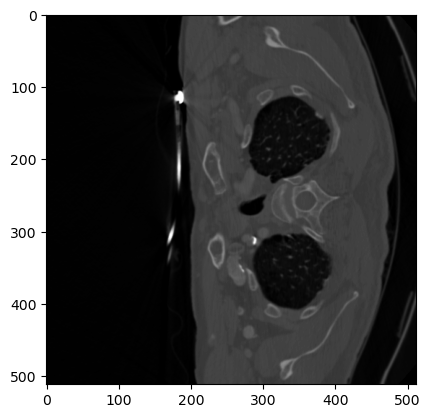

In [15]:
imshow(image[:,:,Z], cmap='gray')

In [19]:
# load TS output
artery_l = nib.load(DATAPATH + 'TS/62/common_carotid_artery_left.nii.gz').get_fdata()
artery_r = nib.load(DATAPATH + 'TS/62/common_carotid_artery_right.nii.gz').get_fdata()

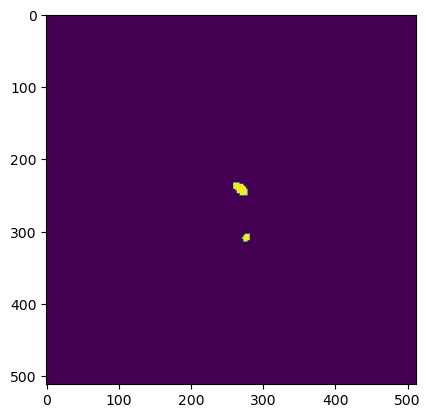

In [20]:
imshow((artery_l + artery_r)[:,:,Z])

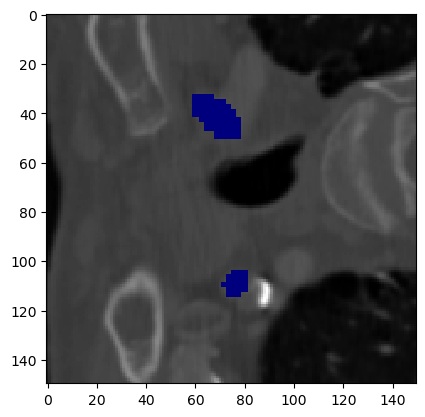

In [24]:
plt.figure()
plt.imshow(image[200:350,200:350,Z], cmap='gray', interpolation='none')
masked = np.ma.masked_where((artery_l + artery_r) == 0, (artery_l + artery_r))
plt.imshow(masked[200:350,200:350,Z], cmap='jet', interpolation='none', alpha=1)
plt.show()

In [ ]:
# now dilate 3 times

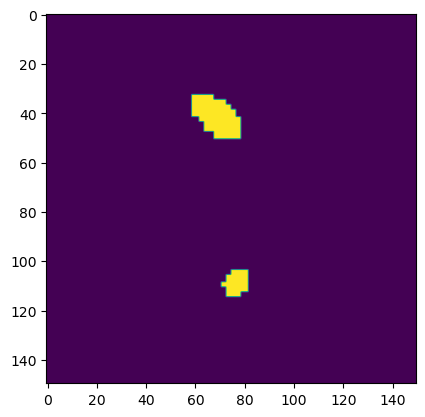

In [26]:
imshow((artery_l + artery_r)[200:350,200:350,Z])

In [28]:
dilated = mh.dilate((artery_l + artery_r).astype(np.bool))

/tmp/ipykernel_2792570/2901396790.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dilated = mh.dilate((artery_l + artery_r).astype(np.bool))


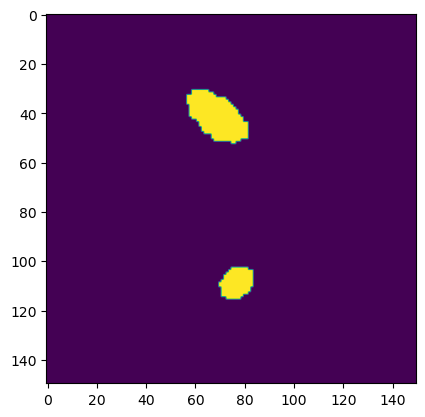

In [29]:
imshow(dilated[200:350,200:350,Z])

In [30]:
dilated = mh.dilate(dilated)

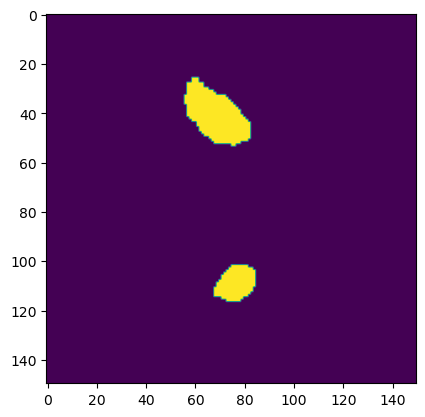

In [31]:
imshow(dilated[200:350,200:350,Z])

In [34]:
dilated = mh.dilate(dilated)

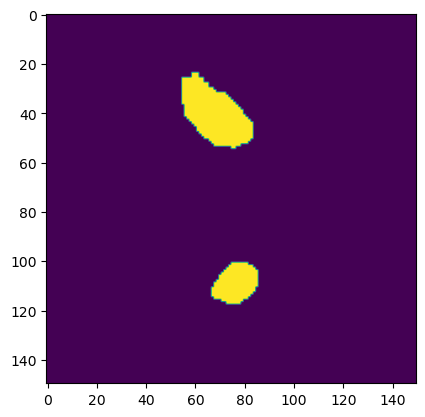

In [35]:
imshow(dilated[200:350,200:350,Z])

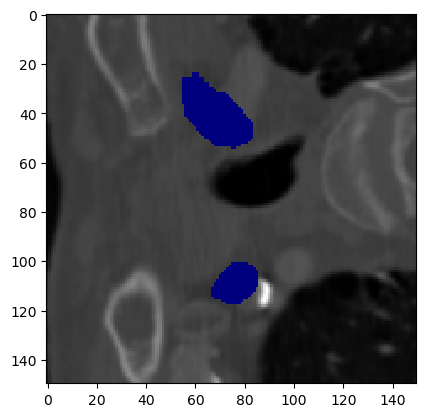

In [36]:
plt.figure()
plt.imshow(image[200:350,200:350,Z], cmap='gray', interpolation='none')
masked = np.ma.masked_where(dilated == 0, dilated)
plt.imshow(masked[200:350,200:350,Z], cmap='jet', interpolation='none', alpha=1)
plt.show()

In [ ]:
# check if the dilated area covers the plaque

In [48]:
# first slice with plaque
np.where(label>0)[2][0]

110

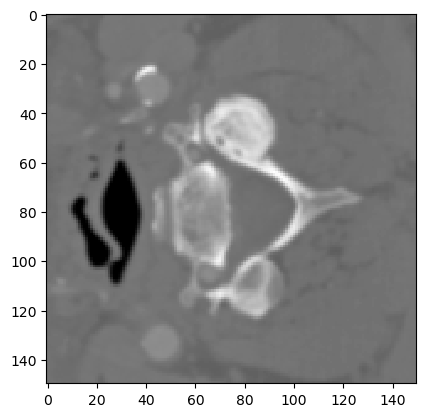

In [42]:
plt.figure()
plt.imshow(image[200:350,200:350,110], cmap='gray', interpolation='none')
masked = np.ma.masked_where(dilated == 0, dilated)
plt.imshow(masked[200:350,200:350,110], cmap='jet', interpolation='none', alpha=1)
plt.show()

In [43]:
masked.shape

(512, 512, 268)

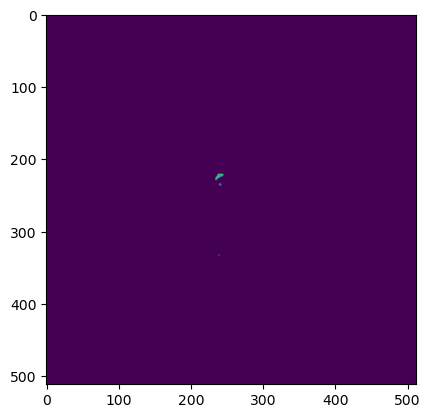

In [39]:
imshow(label[:,:,110])

In [45]:
bbox_l = mh.bbox(artery_l)
bbox_r = mh.bbox(artery_r)

In [46]:
bbox_l

array([266, 324, 259, 291,  30,  73])

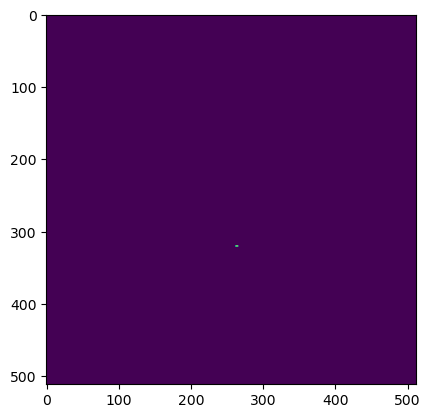

In [52]:
imshow(artery_l[:,:,72])

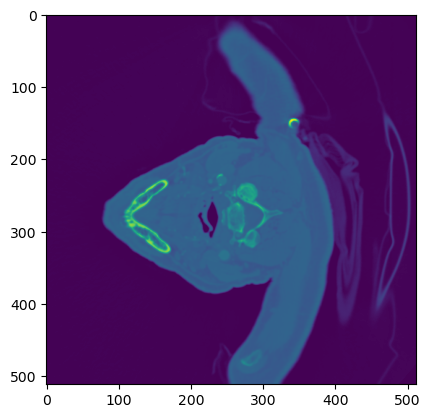

In [57]:
imshow(image[:,:,110])